# Data Ingestion

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
data=pd.read_csv('/content/TSLA (1).CSV')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
#univarite timeseries
stock_data=data[['Date','Close']]

In [5]:
stock_data.head(5)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
stock_data["Date"]=pd.to_datetime(stock_data.Date)

<ipython-input-7-8984b3a36118>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data.Date)


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [9]:
stock_data=stock_data.set_index('Date')

In [10]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [11]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


##*EDA of the Data*


In [12]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


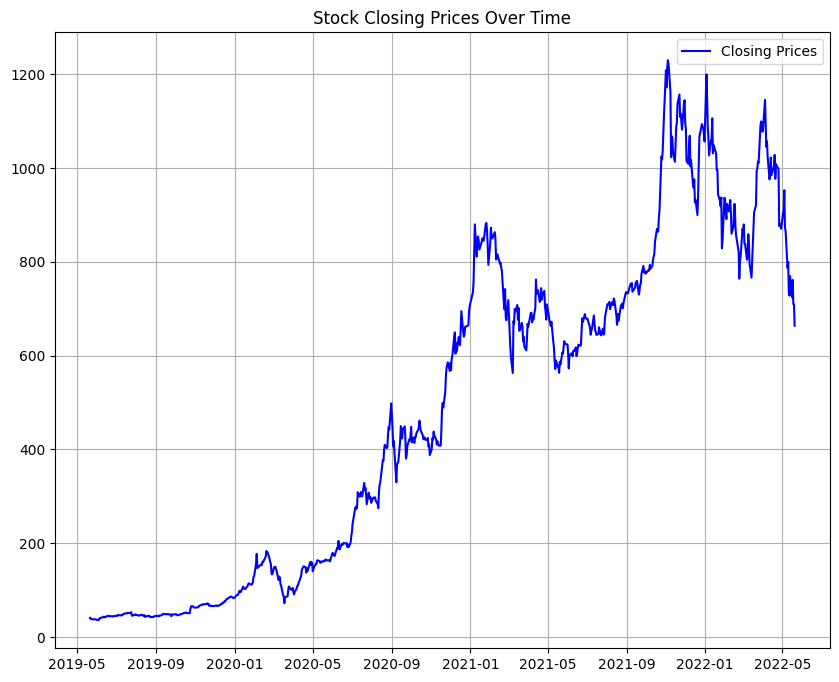

In [13]:
import matplotlib.pyplot as plt

# Assuming stock_data.Close contains the stock's closing prices
plt.figure(figsize=(10, 8))  # Set the figure size

# Plotting the closing prices with a specific color, linestyle, and label
plt.plot(stock_data.Close, color='blue', linestyle='-', label='Closing Prices')

# Adding title and labels
plt.title('Stock Closing Prices Over Time')

# Adding gridlines
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()


(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

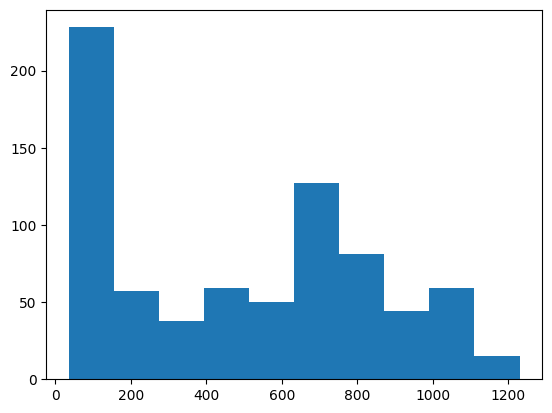

In [14]:
plt.hist(stock_data.Close)

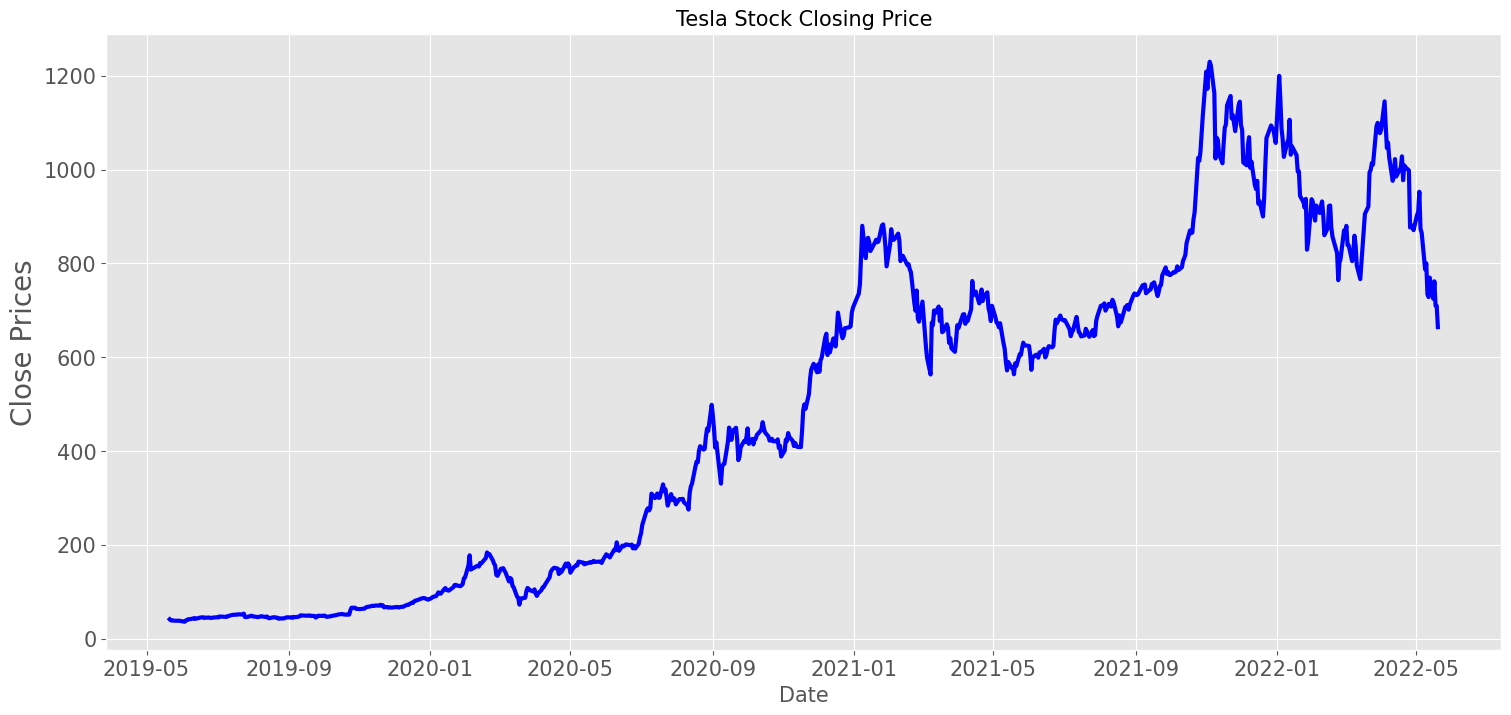

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Date', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 15)
plt.show()



<ipython-input-17-46a4cb4fe73c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<Axes: xlabel='Close', ylabel='Density'>

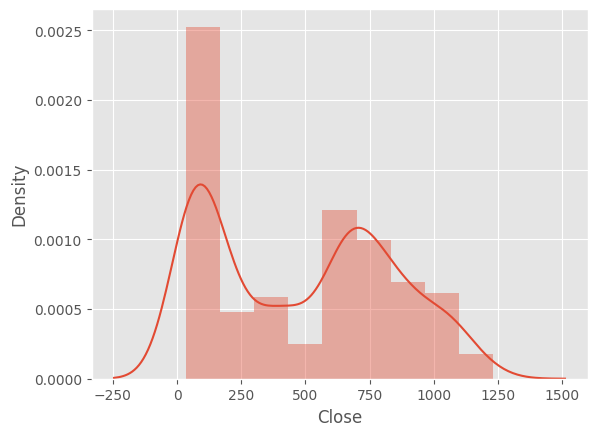

In [17]:
import seaborn as sns
sns.distplot(stock_data.Close)

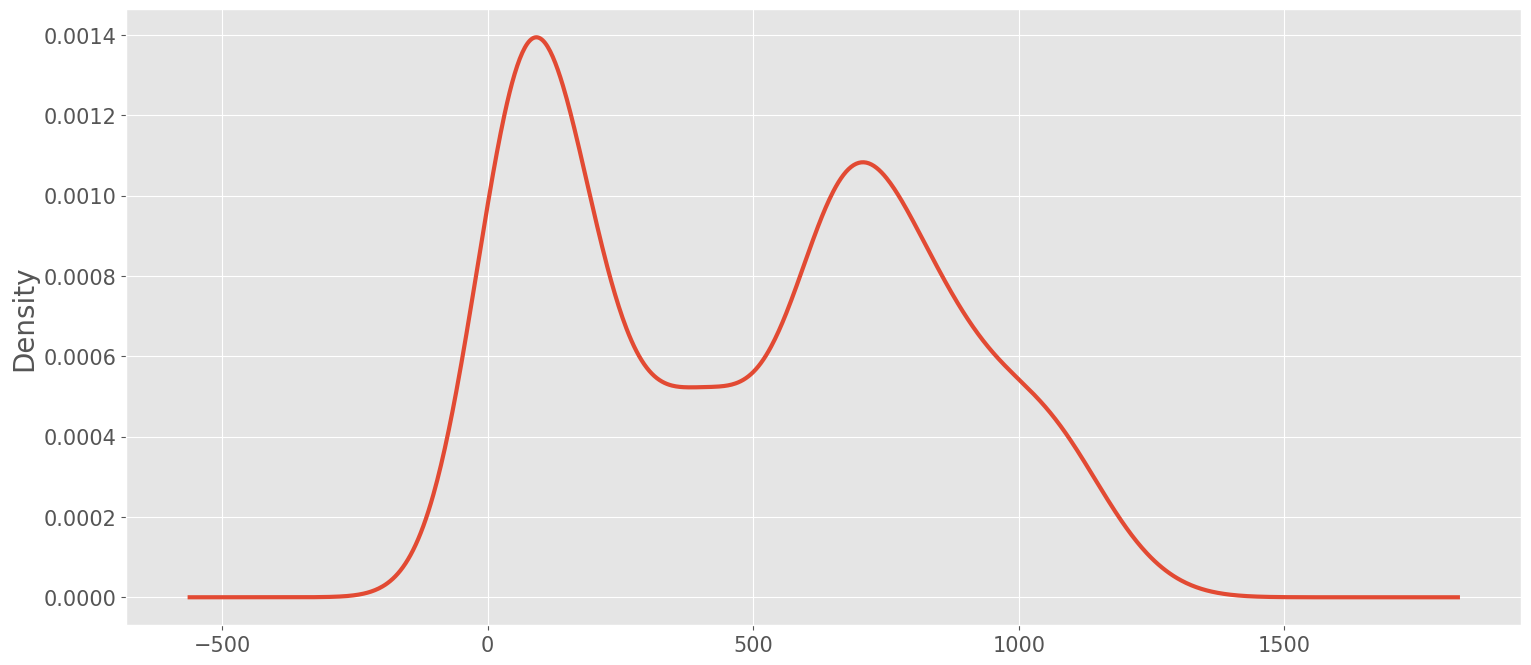

In [18]:
## Distribution of close price

df_close=stock_data['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid('both')
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [19]:

rolmean=stock_data['Close'].rolling(48).mean()

In [20]:
rolstd=stock_data['Close'].rolling(48).std()

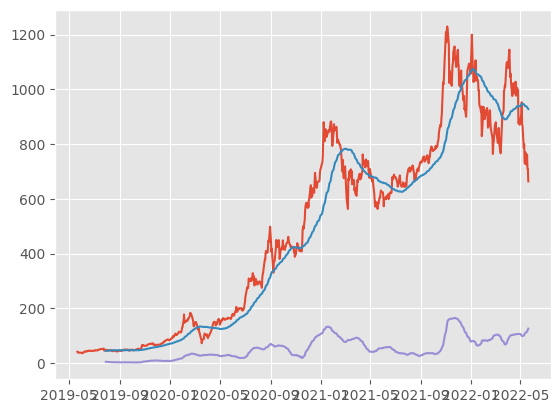

In [21]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [22]:
# ADF(adda fuller test)

from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data['Close'])

In [23]:
pd.Series(adft[0:4],index=['test stats','p_value','lag','datapoints'])

test stats     -1.363009
p_value         0.599876
lag             9.000000
datapoints    748.000000
dtype: float64

In [24]:
## test for staionarity

def test_stationarity(timeseries):

# Determing rolling statistics

    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation

        # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)



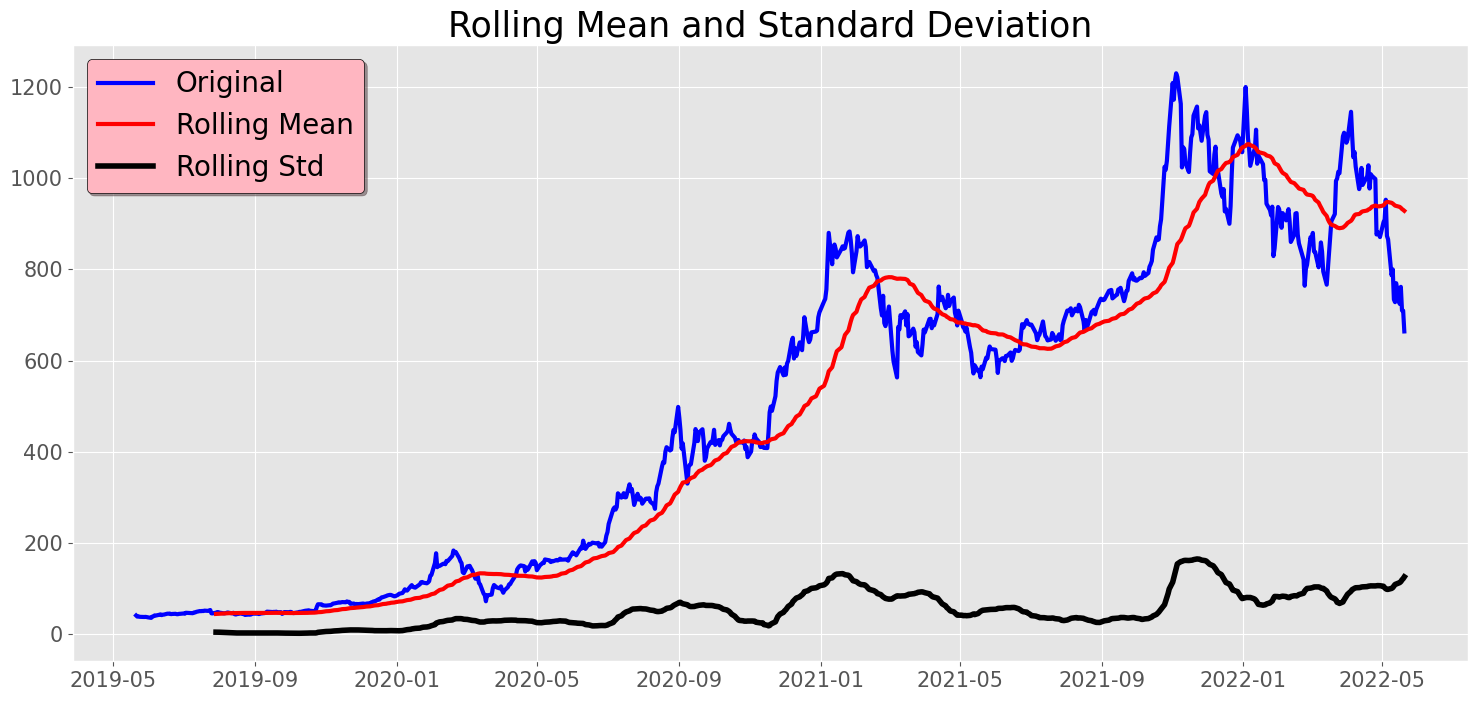

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [25]:
test_stationarity(stock_data.Close)

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

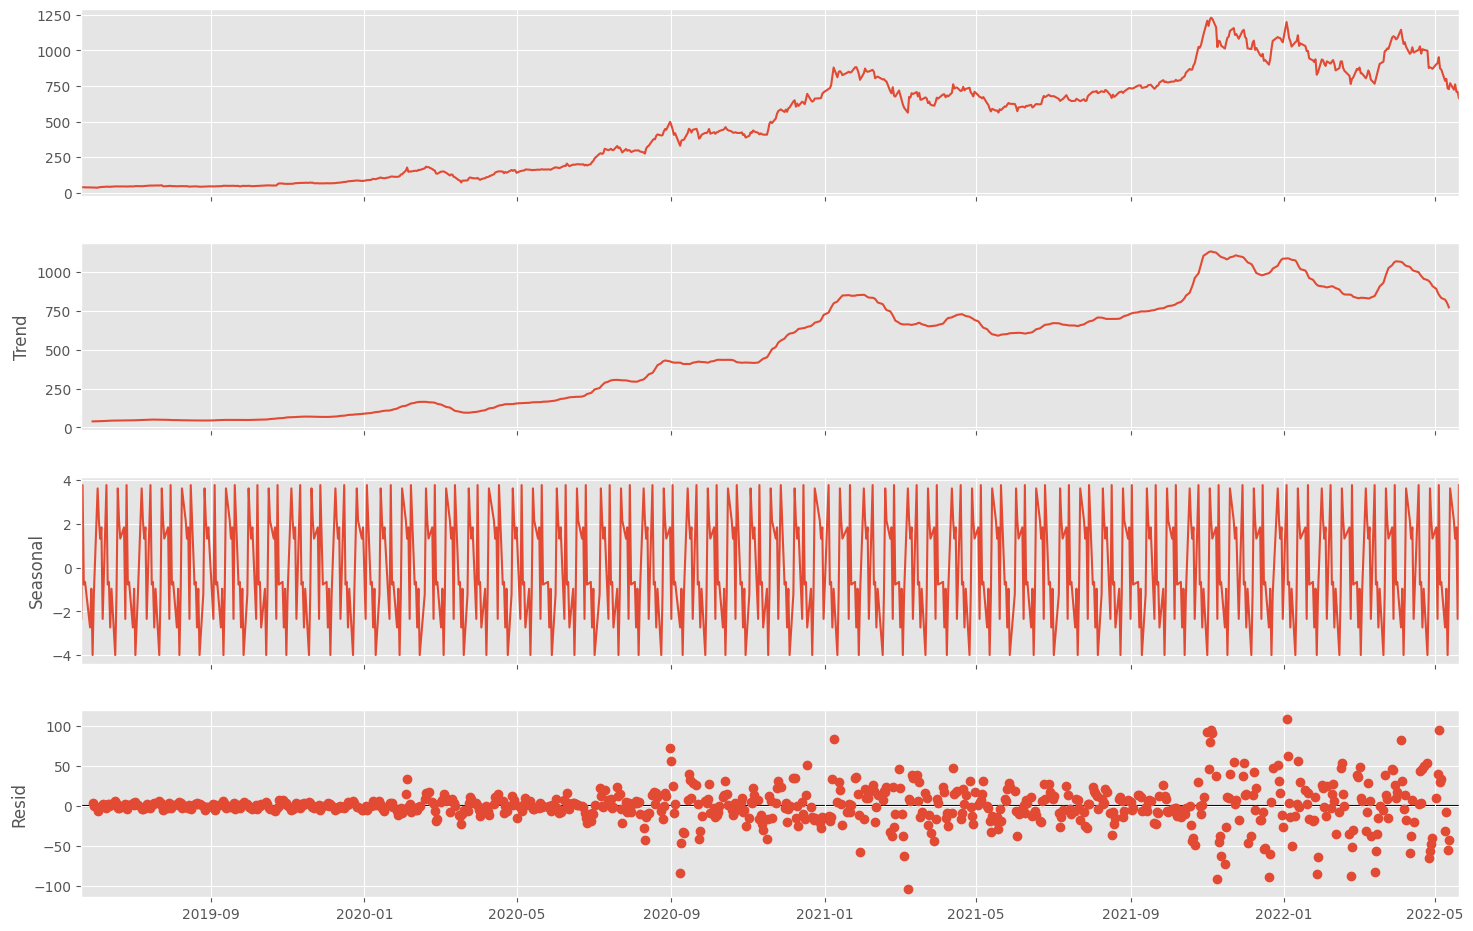

In [27]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")


<Figure size 2000x1000 with 0 Axes>

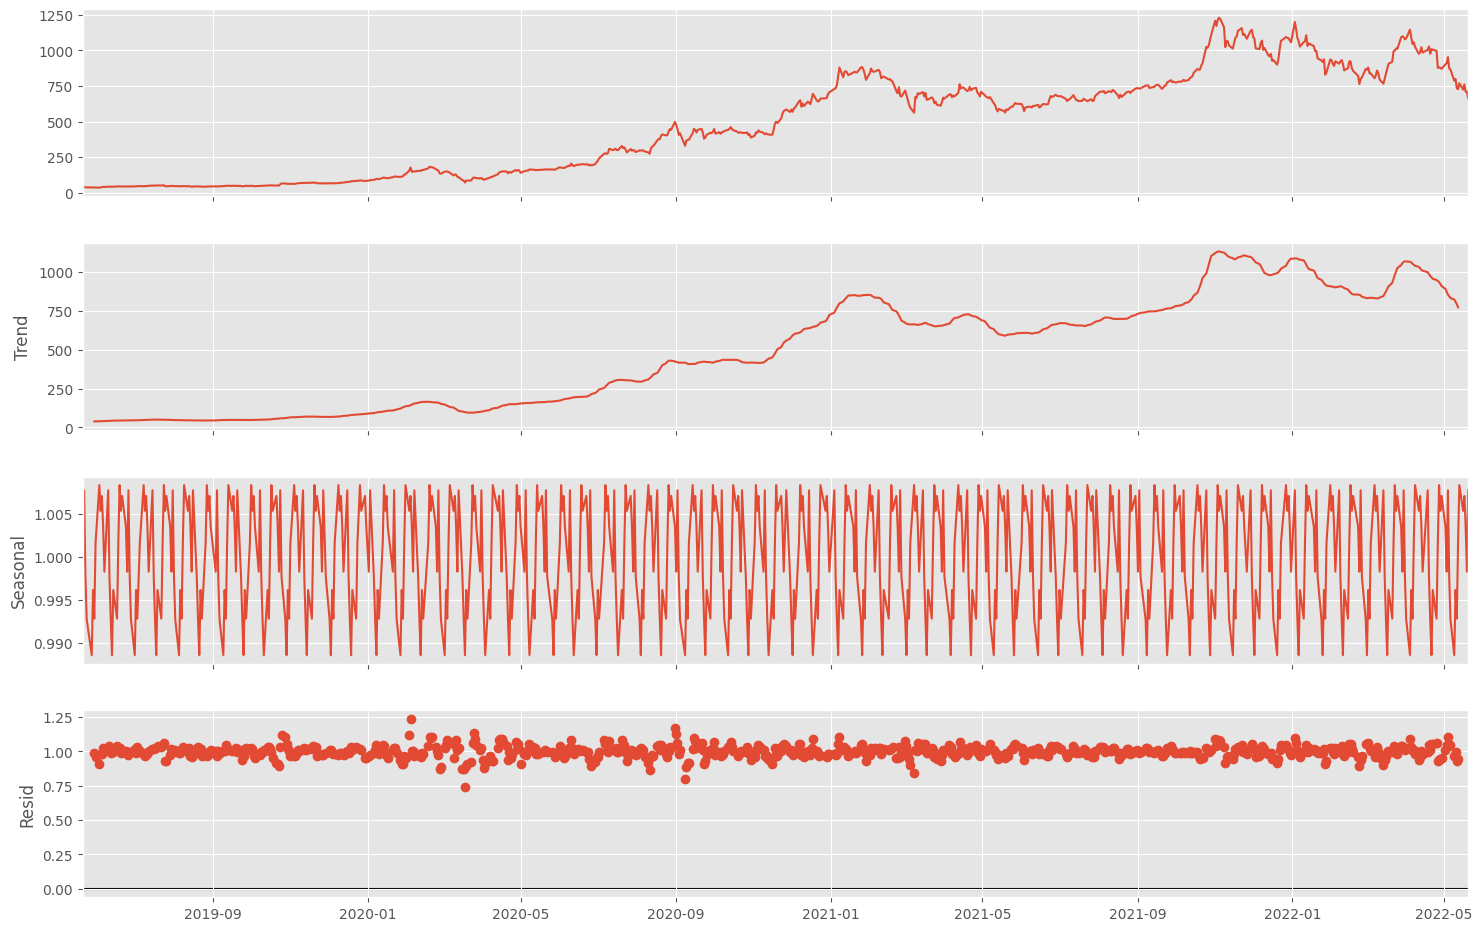

In [29]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: >

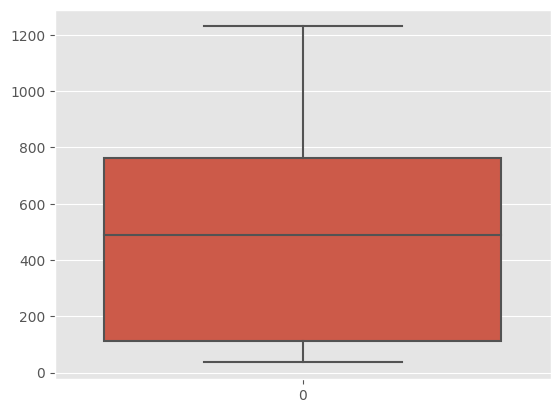

In [30]:
#check outliers
import seaborn as sns
sns.boxplot(stock_data.Close)

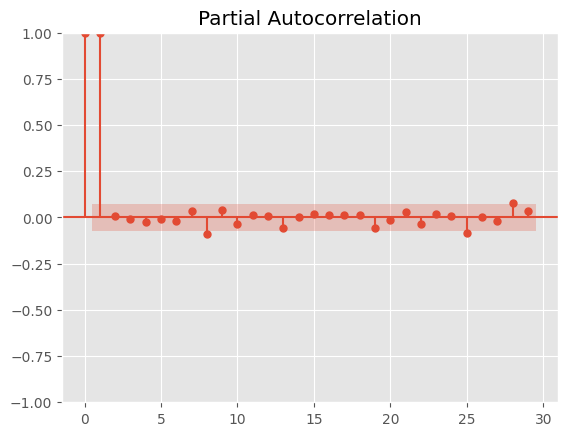

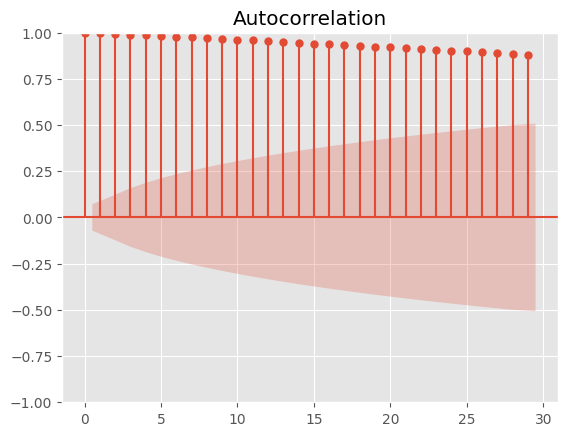

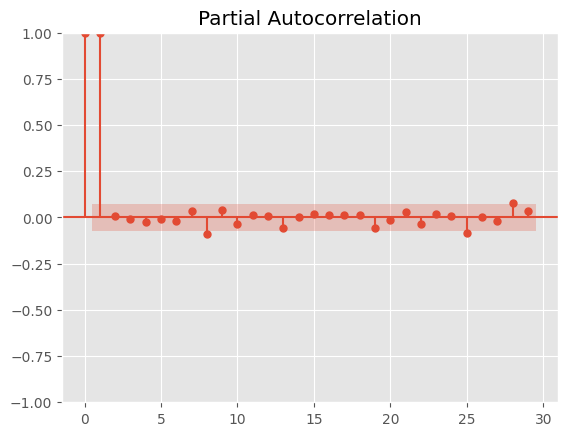

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [32]:
# preprocessing of the data
df_close=stock_data['Close']


In [33]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [34]:
df_close=df_close.diff()
df_close=df_close.dropna()

In [35]:
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

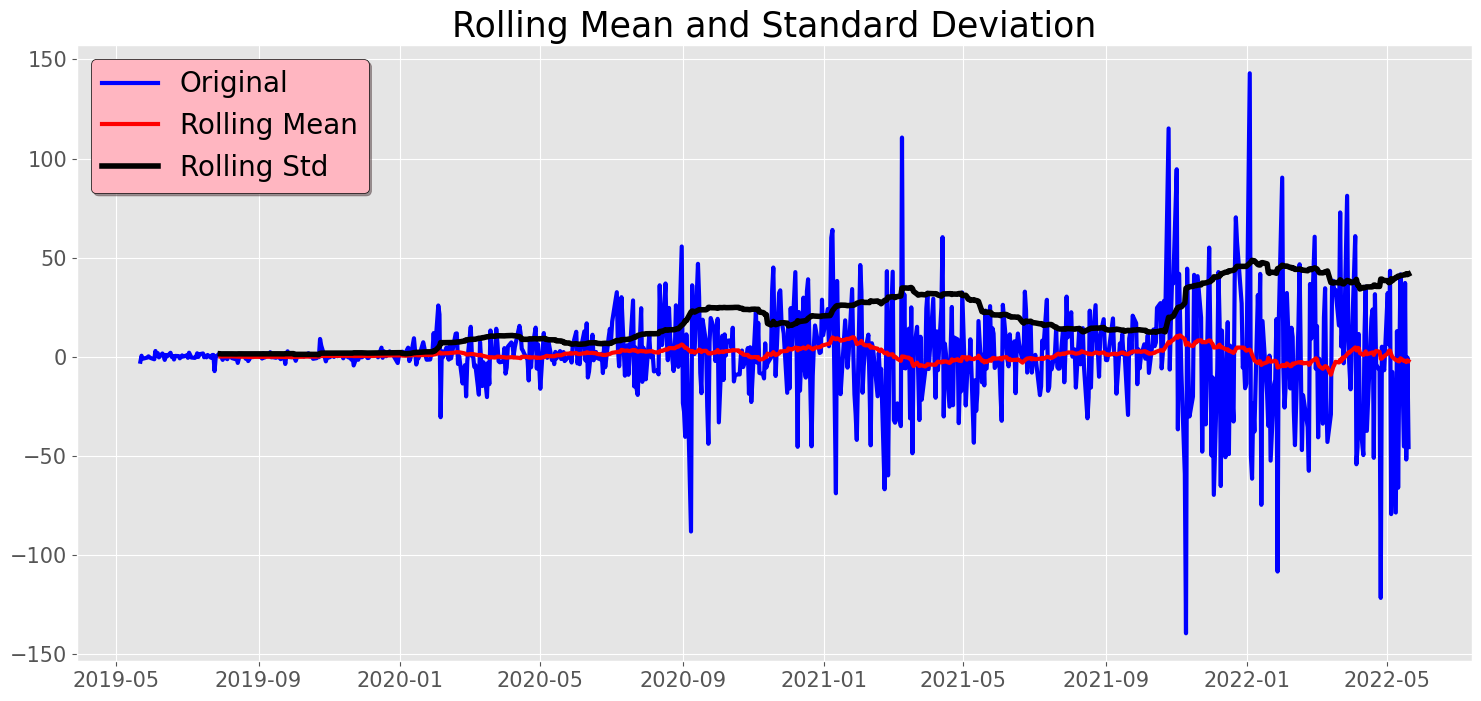

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [36]:
test_stationarity(df_close)

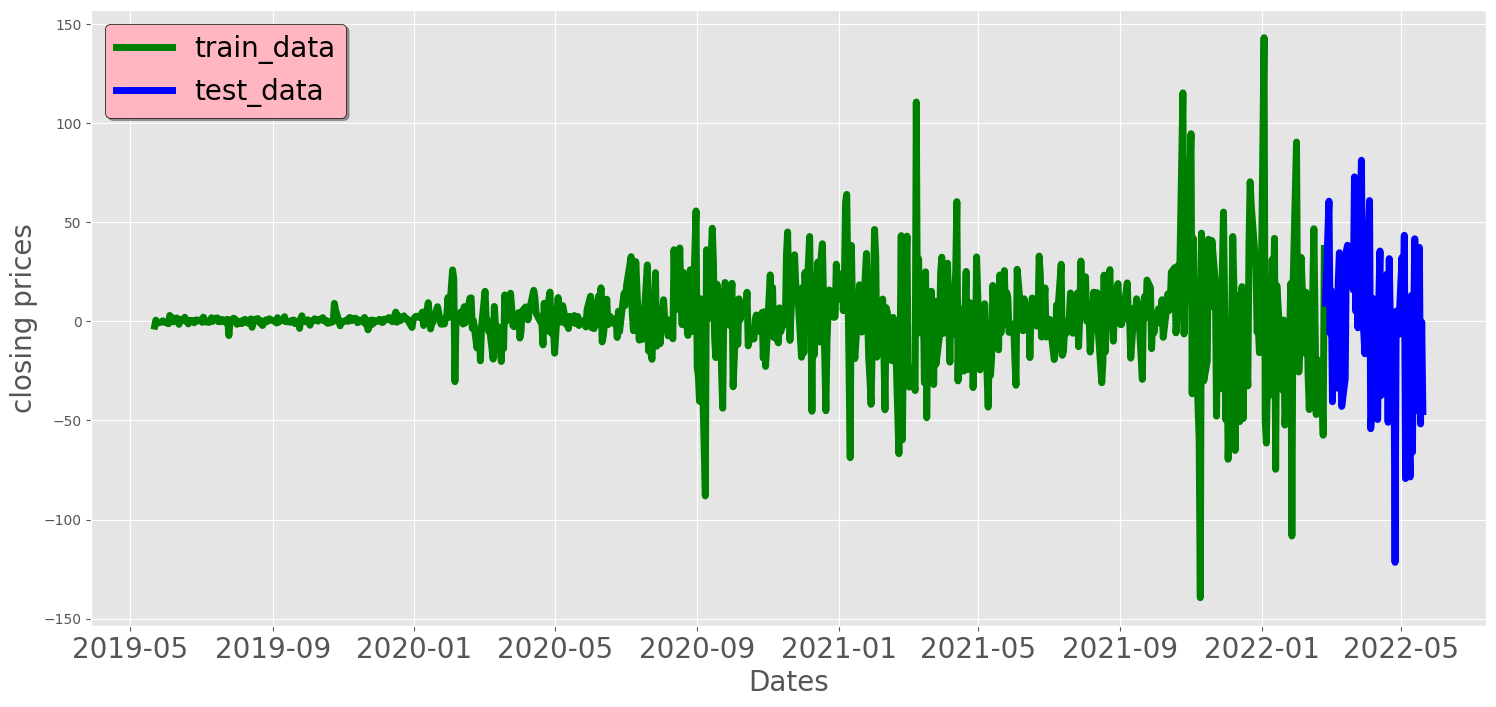

In [37]:
# split data into train and training data
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('closing prices',fontsize=20)
plt.xticks(fontsize=20)
plt.xticks(fontsize=20)
plt.plot(train_data,'green',label='train_data',linewidth=5)
plt.plot(test_data,'blue',label='test_data',linewidth=5)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')

In [38]:
train_data

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

#MODEL BUILDING

In [39]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
history=[x for x in train_data]

In [41]:
history


[-2.4699974060058594,
 0.5519981384277415,
 -0.9720001220703125,
 -0.385997772216804,
 0.23199844360351562,
 -0.3279991149902344,
 -0.61199951171875,
 -1.2380027770996094,
 2.9260025024414062,
 0.5979995727539062,
 1.871997833251946,
 -0.289997100830071,
 1.6759986877441406,
 0.8439979553222656,
 -1.5679969787597656,
 0.9300003051757812,
 0.20199966430664062,
 2.0219993591308594,
 -0.0579986572265625,
 0.3379974365234375,
 -1.36199951171875,
 0.4480018615722656,
 0.3559989929199219,
 -0.7760009765625,
 -0.09799957275390625,
 0.7140007019042969,
 0.12400054931640625,
 0.7419967651367259,
 -0.523998260498054,
 2.0699996948242188,
 -0.3600006103515625,
 -0.5519981384277344,
 -0.055999755859375,
 1.7719993591308665,
 -0.06399917602539773,
 1.2959976196289062,
 1.6840019226074219,
 -0.2239990234375,
 0.4959983825683594,
 -0.26399993896484375,
 0.9280014038085938,
 -0.5,
 0.8979988098144602,
 0.9420013427734304,
 -7.212001800537102,
 -0.15599822998047586,
 1.5459976196289062,
 1.298000335693

In [42]:
model=ARIMA(history,order=(1,1,1))

In [43]:
model=model.fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.870
Date:                Sat, 11 Nov 2023   AIC                           6303.741
Time:                        09:14:50   BIC                           6317.377
Sample:                             0   HQIC                          6309.013
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.025     -1.150      0.250      -0.077       0.020
ma.L1         -0.9991      0.012    -81.341      0.000      -1.023      -0.975
sigma2       493.6006     12.978     38.035      0.000     468.165     519.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              31.85   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model.forecast()[0]

0.04741686925201094

In [46]:
test_data[0]

9.0999755859375

In [47]:
mean_squared_error([test_data[0]],model.forecast())

81.94881931903844

In [48]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

9.052558716685489

In [49]:
def train_arima_model(X,y,arima_order):
  history=[x for x in X]
  predictions=list()
  for t in range(len(y)):
    model=ARIMA(history,order=arima_order)
    model_fit=model.fit()
    yhat=model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(y[t])
  rmse=np.sqrt(mean_squared_error(y,predictions))
  return rmse

In [50]:
def evaluate_models(dataset,test,p_values,d_values,q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg =float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse = train_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg=rmse,order
                    print('ARIMA%s RMSE=%.3f'%(order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' %(best_cfg,best_score))



In [51]:
import warnings
warnings.filterwarnings('ignore')
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)
evaluate_models(train_data,test_data,p_values,d_values,q_values)


ARIMA(0, 0, 0) RMSE=39.610
ARIMA(0, 0, 1) RMSE=39.578
ARIMA(0, 0, 2) RMSE=39.728
ARIMA(0, 1, 0) RMSE=57.835
ARIMA(0, 1, 1) RMSE=39.611
ARIMA(0, 1, 2) RMSE=39.580
ARIMA(0, 2, 0) RMSE=104.683
ARIMA(0, 2, 1) RMSE=57.876
ARIMA(0, 2, 2) RMSE=39.615
ARIMA(1, 0, 0) RMSE=39.570
ARIMA(1, 0, 1) RMSE=39.636
ARIMA(1, 0, 2) RMSE=40.047
ARIMA(1, 1, 0) RMSE=46.184
ARIMA(1, 1, 1) RMSE=39.573
ARIMA(1, 1, 2) RMSE=39.731
ARIMA(1, 2, 0) RMSE=68.740
ARIMA(1, 2, 1) RMSE=46.221
ARIMA(1, 2, 2) RMSE=39.529
ARIMA(2, 0, 0) RMSE=39.746
ARIMA(2, 0, 1) RMSE=39.884
ARIMA(2, 0, 2) RMSE=40.100
ARIMA(2, 1, 0) RMSE=45.781
ARIMA(2, 1, 1) RMSE=39.738
ARIMA(2, 1, 2) RMSE=39.732
ARIMA(2, 2, 0) RMSE=63.008
ARIMA(2, 2, 1) RMSE=45.809
Best ARIMA(1, 2, 2) RMSE=39.529


In [52]:
history=[x for x in train_data]
predictions=list()
for i in range(len(test_data)):
  model=ARIMA(history,order=(1,2,2))
  model=model.fit()
  fc=model.forecast(alpha=0.05)
  predictions.append(fc)
  history.append(test_data[1])
print(f"my RMSE {np.sqrt (mean_squared_error(test_data,predictions))}")

my RMSE 68.74093334893995


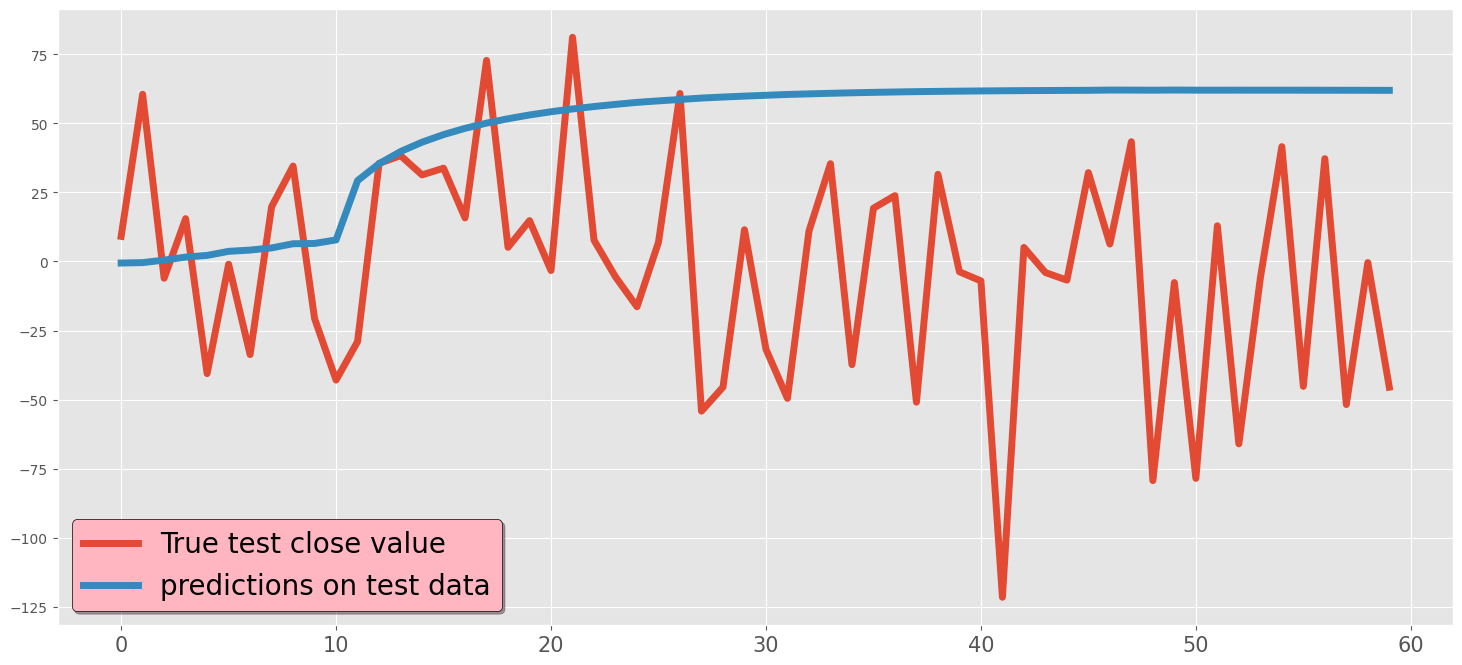

In [53]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data,label='True test close value',linewidth=5)
plt.plot(range(len(predictions)),predictions,label='predictions on test data',linewidth=5)
plt.xticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
plt.show()

In [54]:
fc_series=pd.Series(predictions,index=test_data.index)

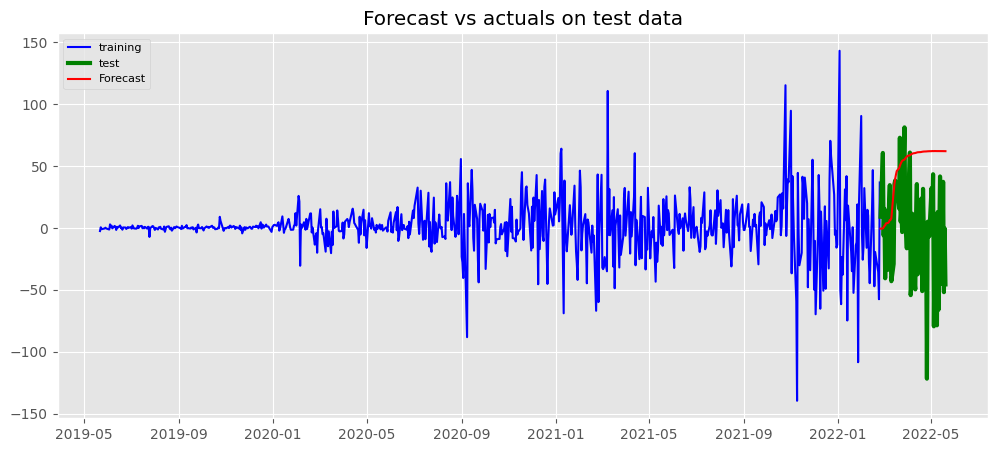

In [55]:
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train_data,label='training',color='blue')
plt.plot(test_data,label='test',color='green',linewidth=3)
plt.plot(fc_series,label='Forecast',color='red')
plt.title('Forecast vs actuals on test data')
plt.legend(loc='upper left',fontsize=8)
plt.show()


In [57]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 57.86925258260208


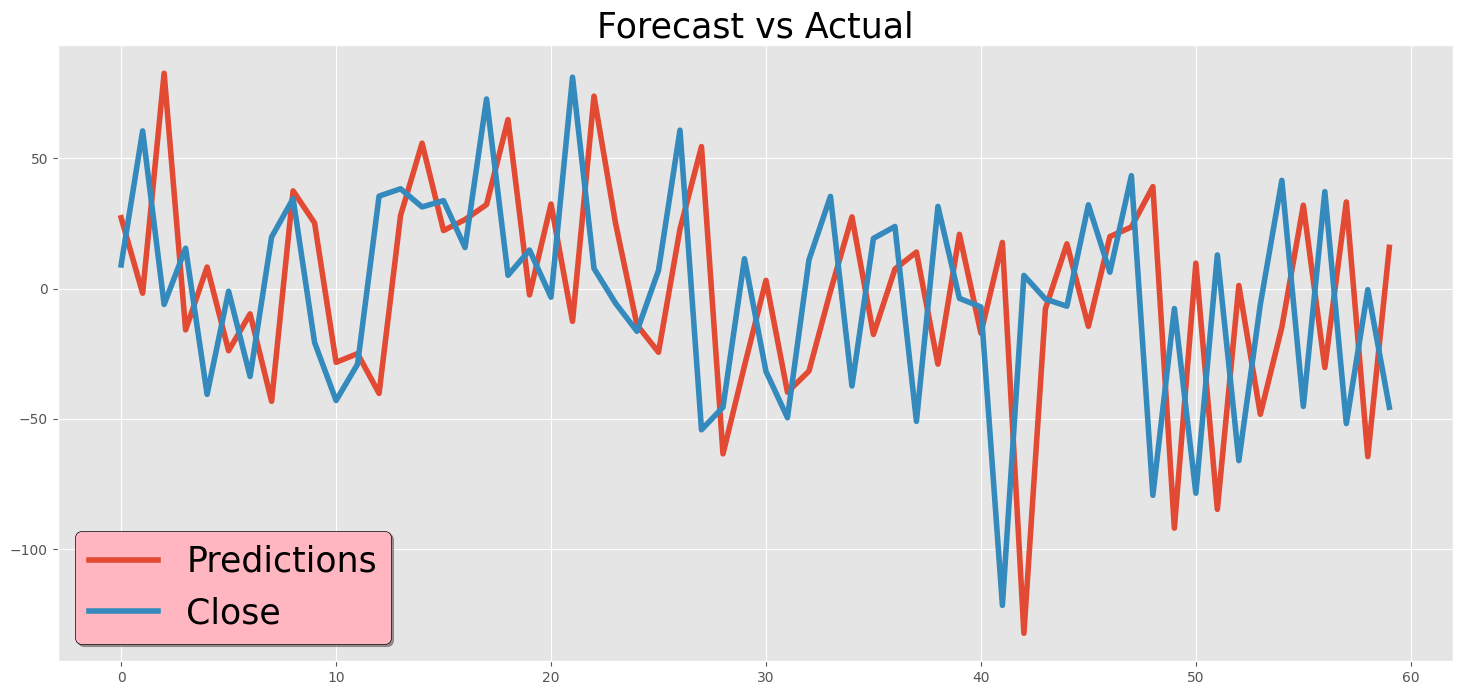

In [58]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')